# Practical Lab 6 - Logistic Regression
**Name: Chen, Kun**<br/>
**ID: 8977010**

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 0. Load iris dataset

In [214]:
iris = datasets.load_iris()

iris_dataframe = pd.DataFrame(iris.data,  columns=iris.feature_names)
iris_dataframe['target'] = iris.target
target_names = {
    0:'non-virginica',
    1:'non-virginica', 
    2:'virginica'
}
iris_dataframe['target_names'] = iris_dataframe['target'].map(target_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,non-virginica
1,4.9,3.0,1.4,0.2,0,non-virginica
2,4.7,3.2,1.3,0.2,0,non-virginica
3,4.6,3.1,1.5,0.2,0,non-virginica
4,5.0,3.6,1.4,0.2,0,non-virginica


### 1. Check that the dataset contains invalid data, outlier and drop the duplicate data items

In [215]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_names       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


According to the following figure, we can see that the data distribution is good, there are not too many outlier.

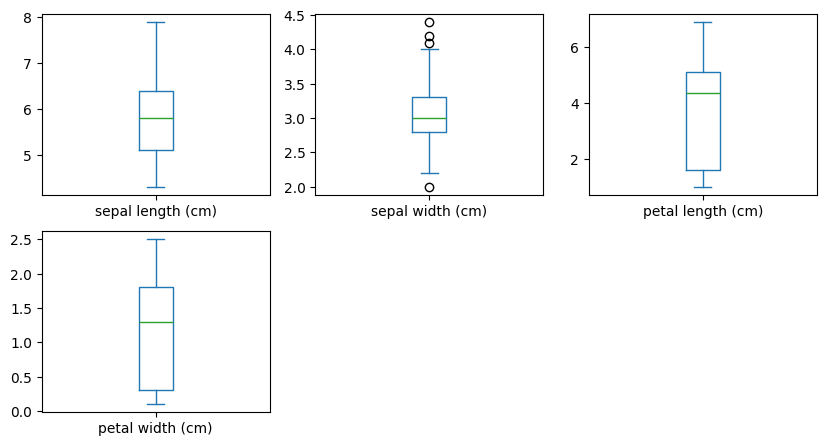

In [216]:
iris_dataframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] \
    .plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8))
plt.show()

### 2. Print descriptive statistics of two classes

In [217]:
iris_dataframe.groupby('target_names').describe().transpose()

target_names             non-virginica  virginica
sepal length (cm) count     100.000000  50.000000
                  mean        5.471000   6.588000
                  std         0.641698   0.635880
                  min         4.300000   4.900000
                  25%         5.000000   6.225000
                  50%         5.400000   6.500000
                  75%         5.900000   6.900000
                  max         7.000000   7.900000
sepal width (cm)  count     100.000000  50.000000
                  mean        3.099000   2.974000
                  std         0.478739   0.322497
                  min         2.000000   2.200000
                  25%         2.800000   2.800000
                  50%         3.050000   3.000000
                  75%         3.400000   3.175000
                  max         4.400000   3.800000
petal length (cm) count     100.000000  50.000000
                  mean        2.861000   5.552000
                  std         1.449549   0.551895
                  min         1.000000   4.500000
                  25%         1.500000   5.100000
                  50%         2.450000   5.550000
                  75%         4.325000   5.875000
                  max         5.100000   6.900000
petal width (cm)  count     100.000000  50.000000
                  mean        0.786000   2.026000
                  std         0.565153   0.274650
                  min         0.100000   1.400000
                  25%         0.200000   1.800000
                  50%         0.800000   2.000000
                  75%         1.300000   2.300000
                  max         1.800000   2.500000
target            count     100.000000  50.000000
                  mean        0.500000   2.000000
                  std         0.502519   0.000000
                  min         0.000000   2.000000
                  25%         0.000000   2.000000
                  50%         0.500000   2.000000
                  75%         1.000000   2.000000
                  max         1.000000   2.000000

### 3. Plot histogram per feature for each of tow classes
Based on the distribution of virginica and non-virginica across features, it can be seen that virginica and non-virginica are very different across features

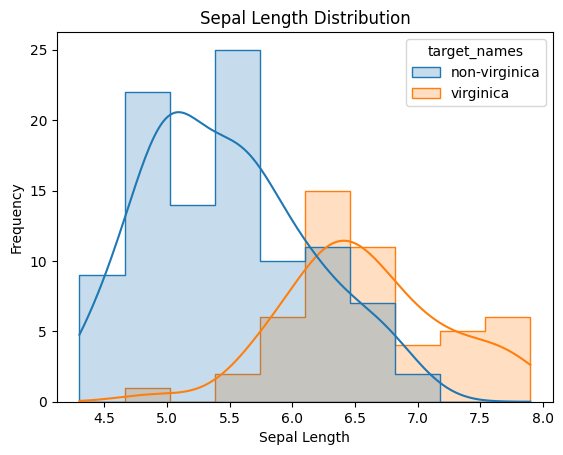

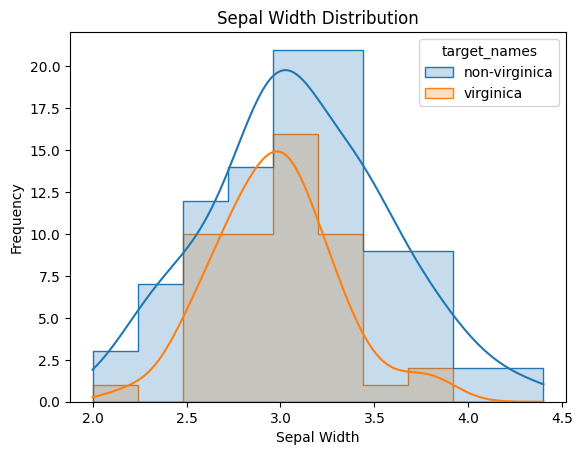

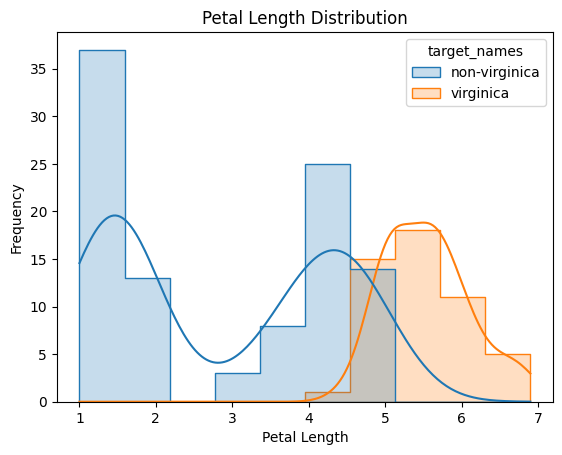

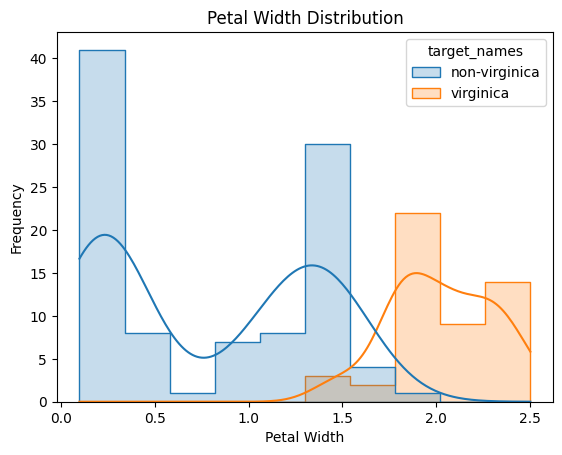

In [218]:
sns.histplot(data=iris_dataframe, x="sepal length (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Sepal Length Distribution")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data=iris_dataframe, x="sepal width (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Sepal Width Distribution")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data=iris_dataframe, x="petal length (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Petal Length Distribution")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data=iris_dataframe, x="petal width (cm)", hue="target_names", bins=10, kde=True, element="step")
plt.title("Petal Width Distribution")
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.show()

### 4. Correlation matrix between the four features
The length and width correlation for petal is very high at 0.96. The length and width band for sepal is believed to be extremely low.

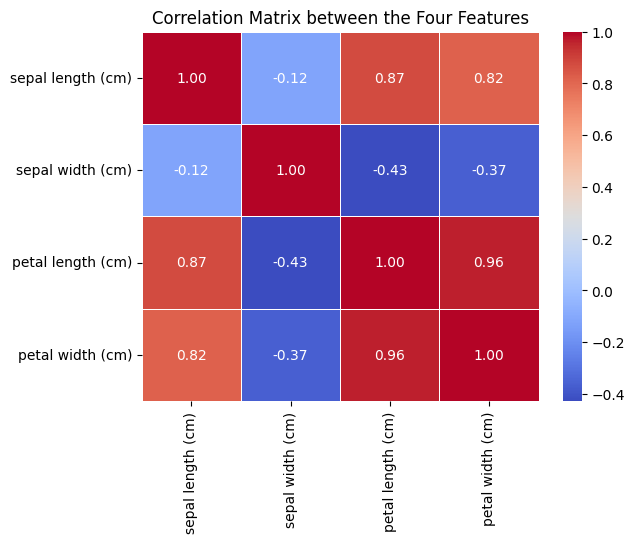

In [219]:
correlation_matrix = iris_dataframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between the Four Features')
plt.show()

### 5. Use seaborn's FacetGrid to color the scatterplot by species
According to the picture below we can seen that virginica has a more elongated sepal shape based on the value of the sepal's height to width ratio. This is an important distinction between virginica and non-virginica. <br/>
refe: https://www.kaggle.com/code/palak98039/python-data-visualizations

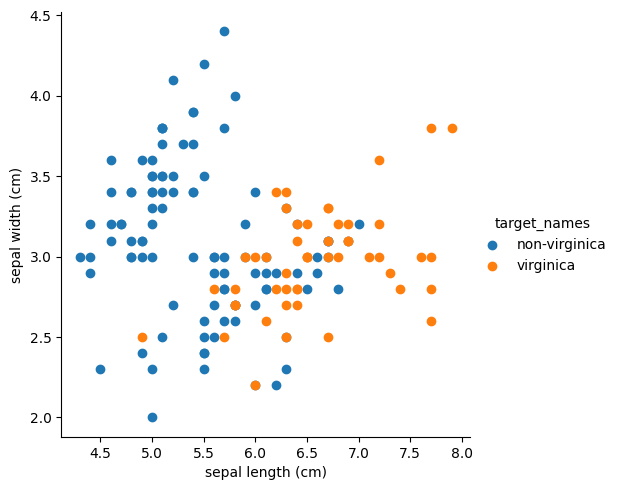

In [220]:
sns.FacetGrid(iris_dataframe, hue='target_names', height=5) \
   .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
   .add_legend()
plt.show()

Base on below graph, It is easier to distinguish between virginica and non-virginica based on the length and width of the petal.<br/>
refe: https://www.kaggle.com/code/mdismielhossenabir/analysis-data-visualization-techniques

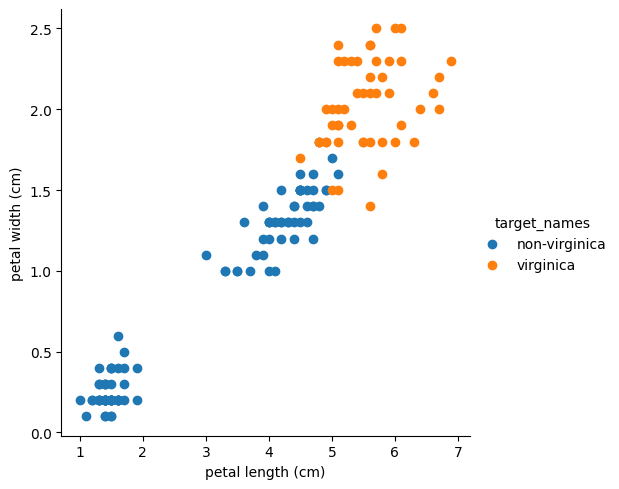

In [221]:
sns.FacetGrid(iris_dataframe, hue='target_names', height=5) \
   .map(plt.scatter, 'petal length (cm)', 'petal width (cm)') \
   .add_legend()
plt.show()

Use catplot bar to compare the distrbution of sepal width and length. <br/>
Use catplot bar to compare the distrbution of petal width and length.<br/>
refe: https://www.kaggle.com/code/mdismielhossenabir/analysis-data-visualization-techniques

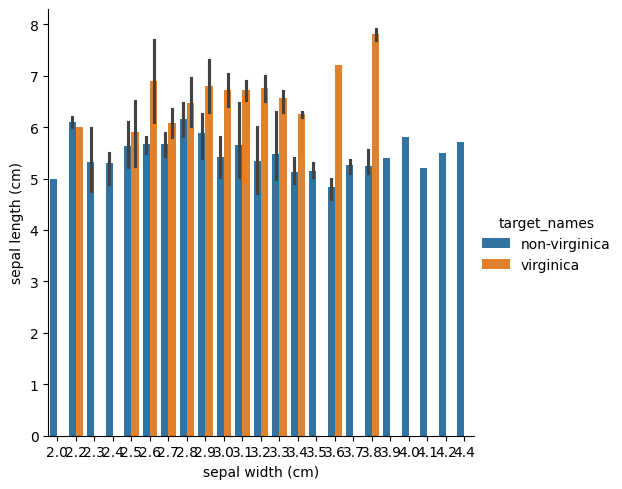

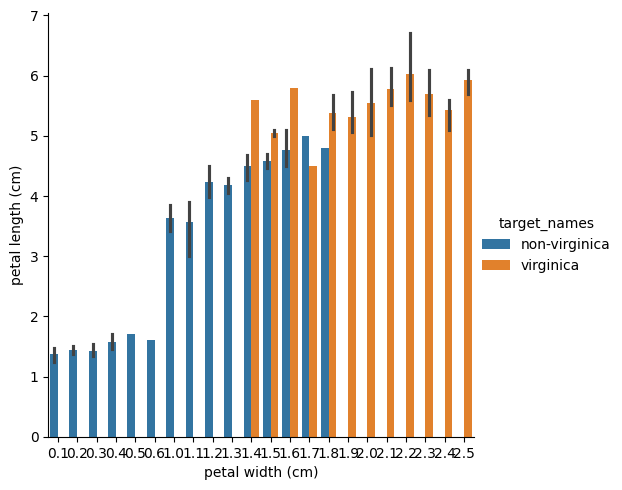

In [222]:
sns.catplot(data=iris_dataframe, kind='bar', x='sepal width (cm)', y='sepal length (cm)', hue='target_names')
sns.catplot(data=iris_dataframe, kind='bar', x='petal width (cm)', y='petal length (cm)', hue='target_names')
plt.show()

### 6. Split the data to a train set, a validation set and a test set.

In [223]:
target_names = {
    0:0,
    1:1,
    2:1
}
x = np.array(iris.data)
y = np.array(iris_dataframe['target'].map(target_names))

train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=True, random_state=42)

### 7. Run four logistic regression models

In [224]:
log_reg = list()
for i in range(x.shape[1]):
    log_reg.append(LogisticRegression(max_iter = 1000, random_state=42))
    log_reg[i].fit(x_train[:,i].reshape(-1, 1), y_train)

(150, 4)


### 8. Evaluate the models on the validation set

In [229]:
result_pds = list()
for i in range(x.shape[1]):
    result_pds.append(pd.DataFrame(columns=['Index', 'Probability', 'Prediction', 'GroundTruth'], index=range(15)))
    result_pds[i]['Prediction'] = log_reg[i].predict(x_val[:, i].reshape(-1, 1))
    result_pds[i]['Probability'] = log_reg[i].predict_proba(x_val[:, i].reshape(-1, 1))[:, 1]
    result_pds[i]['GroundTruth'] = y_val
    print((result_pds[i]['Prediction'] == result_pds[i]['GroundTruth']).sum()/15)
result_pds

0.9333333333333333
0.8666666666666667
1.0
1.0


[   Index  Probability  Prediction  GroundTruth
 0    NaN     0.260944           0            0
 1    NaN     0.769338           1            0
 2    NaN     0.999510           1            1
 3    NaN     0.988022           1            1
 4    NaN     0.897246           1            1
 5    NaN     0.923282           1            1
 6    NaN     0.988022           1            1
 7    NaN     0.769338           1            1
 8    NaN     0.156741           0            0
 9    NaN     0.118837           0            0
 10   NaN     0.993658           1            1
 11   NaN     0.977490           1            1
 12   NaN     0.327335           0            0
 13   NaN     0.969238           1            1
 14   NaN     0.707603           1            1,
    Index  Probability  Prediction  GroundTruth
 0    NaN     0.465581           0            0
 1    NaN     0.202501           0            0
 2    NaN     0.911153           1            1
 3    NaN     0.749313           1     

### 9. Print the accuracy of each model
accuracy = count(predication == GroudTruth)/Sample Number

In [238]:
for i in range(x.shape[1]):
    print('The accuracy of Model {:} is: {:.2f}%'.format(i, (result_pds[i]["Prediction"] == result_pds[i]["GroundTruth"]).sum()/15*100))

The accuracy of Model 0 is: 93.33%
The accuracy of Model 1 is: 86.67%
The accuracy of Model 2 is: 100.00%
The accuracy of Model 3 is: 100.00%
